# Exercício de Regressão Linear

Coloque aqui o seu exercício de Regressão Linear discutido em classe, em particular o código de visualização do Espaço de Parâmetros durante o treinamento

Coloque outras coisas que você acha interessante como exercício didático.

In [1]:
print('Meu nome é: Diego Pereira Domingos')
print('Meu RA é: 090923')

Meu nome é: Diego Pereira Domingos
Meu RA é: 090923


Coloque o seu programa aqui neste notebook. No final salve os seus gráficos como imagens PNG:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from random import random
%matplotlib inline

DF_GRADIENT_DESCENT = 0
STCH_GRADIENT_DESCENT = 1

def batch_gradient_descent(X, y, w_init, lr, n_epochs):
    '''
    Perform batch gradient descent to learn w
    by taking n_epochs gradient steps with learning
    rate lr
    Dados rotulados: X.shape:(M,2) e y.shape:(M,1)
    Parâmetro inicial: w_init.shape:(1,2)
    output: w_history:(num_epochs+1,2)
    '''
    M = y.size
    w_history = np.zeros((2,n_epochs+1))
    wT = w_init
    w_history[:,0] = wT[:,0]

    for i in range(n_epochs):
        wT = wT - lr * (2.0 / M) * (X.T).dot(X.dot(wT) - y)
        w_history[:,i+1]=wT[:,0]
    return w_history.T

def stochastic_gradient_descent(X, y, w_init, lr, n_epochs):
    '''
    Perform stochastic gradient descent to learn w
    by taking n_epochs times number of samples 
    gradient steps with learning rate lr
    Dados rotulados: X.shape:(M,2) e y.shape:(M,1)
    Parâmetro inicial: w_init.shape:(1,2)
    output: w_history:(num_epochs+1,2)
    '''
    M = y.size
    w_history = np.zeros((2,(M*n_epochs)+1))
    wT = w_init
    w_history[:,0] = wT[:,0]

    for i in range(n_epochs):
        for jj in range(M):
            j = np.random.randint(M)
            wT = wT - lr * 2.0 * (X[j:j+1,:].T).dot(X[j:j+1,:].dot(wT) - y[j:j+1])
            w_history[:,jj+(i*M)+1] = wT[:,0]
    return w_history.T

def compute_cost(X_b, y, wT):
    '''
    Compute cost for linear regression
    (X,y): amostras rotuladas X(n_samples,2) e y(n_samples,)
    wT: vetor coluna de parâmetros (já transposto)
       aceita tanto shape (2,1) Para um caso como (2,n_history) para n_history casos
    '''
    e = X_b.dot(wT) - y
    J = (e * e).mean(axis=0)
    return J

In [27]:
MULT_FACTOR = 2
LEARNING_RATE = 0.005
N_EPHOCS = 15
N_DIV_WT = 100

def training_path_view(X_b,y,gradient_type=DF_GRADIENT_DESCENT):
    
    # wT_init
    wT_init = np.random.randint(-MULT_FACTOR, MULT_FACTOR, (2, 2))
    
    # Run batch gradient on given dataset
    if gradient_type == DF_GRADIENT_DESCENT:
        a = batch_gradient_descent(X_b,y,wT_init,LEARNING_RATE,N_EPHOCS)
    elif gradient_type == STCH_GRADIENT_DESCENT:
        a = stochastic_gradient_descent(X_b,y,wT_init,LEARNING_RATE,N_EPHOCS)
    J_a = np.zeros((len(a),1))
    for i in range(len(a)):
        J_a[i,0] = compute_cost(X_b,y,np.array([a[i,:],a[i,:]]).T)[0]
    
    # Create the figure
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection="3d")
    
    # Make data
    # Because we are dealing with 2-dim wT, we need to initialize
    # two different arrays
    #theta_basis = np.linspace(a[:,1].min()-0.6,a[:,1].max()+0.6,N_DIV_WT)
    #theta_basis2 = np.linspace(a[:,0].min()-0.6,a[:,0].max()+0.6,N_DIV_WT)
    
    theta_basis = np.linspace(-MULT_FACTOR,MULT_FACTOR,N_DIV_WT)
    theta_basis2 = np.linspace(-MULT_FACTOR,MULT_FACTOR,N_DIV_WT)
    
    
    J_grid = np.zeros((len(theta_basis),len(theta_basis2)))
    for i in range(len(theta_basis)):
        for j in range(len(theta_basis2)):
            t = np.array([[theta_basis2[i]],[theta_basis[j]]])
            J_grid[i,j] = compute_cost(X_b,y,t)

            
    theta_basis, theta_basis2 = np.meshgrid(theta_basis,theta_basis2)
    
    # Plot the surface.
    surf = ax.plot_surface(theta_basis, theta_basis2, J_grid, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False,alpha=0.2)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    ax.scatter(a[:,1] , a[:,0] , J_a,  color='green')
    ax.set_xlabel("w0")
    ax.set_ylabel("w1")
    ax.set_zlabel("Cost")
    ax.view_init(elev=12.)
    plt.show()
    fig.savefig("fig_custo.png")

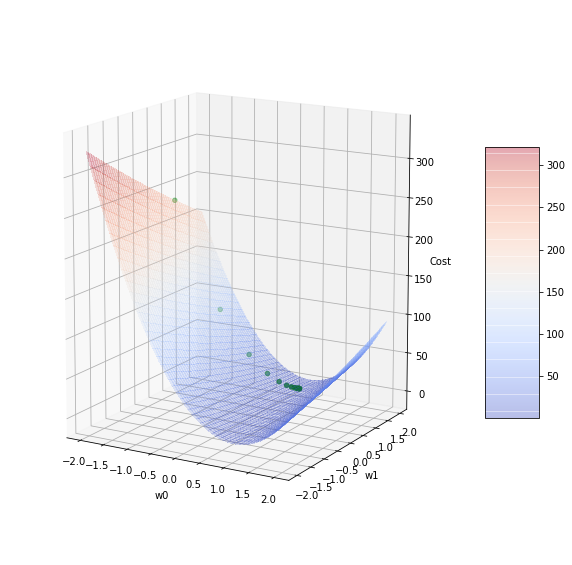

In [28]:
from sklearn.datasets import load_iris
import pandas as pd

# Load iris dataset
iris = load_iris()

data = iris.data[iris.target==1,::2]  # comprimento das sépalas e pétalas, indices 0 e 2

# Load X_b and y sets
X_b = data[:,0:1]
y = data[:,1:2]

# We must concatenate the X_b with ones column to match the
# multiplicator factor of wT[0]
X_b = np.concatenate((np.ones((X_b.shape[0],1)),X_b),axis=1)

training_path_view(X_b,y)


## Testando se o arquivo foi criado e pode ser lido

In [44]:
%ls -l

total 1012
-rw-r--r-- 1 d090923 d090923   5020 Aug 14 19:32 exercise_one_hot.ipynb
-rw-r--r-- 1 d090923 d090923 128684 Aug 14 19:52 fig_custo.png
-rw-r--r-- 1 d090923 d090923 142502 Aug 14 19:51 my_linear_regression.ipynb
-rw-r--r-- 1 d090923 d090923 752168 Aug 14 19:32 Regressao-Linear.ipynb


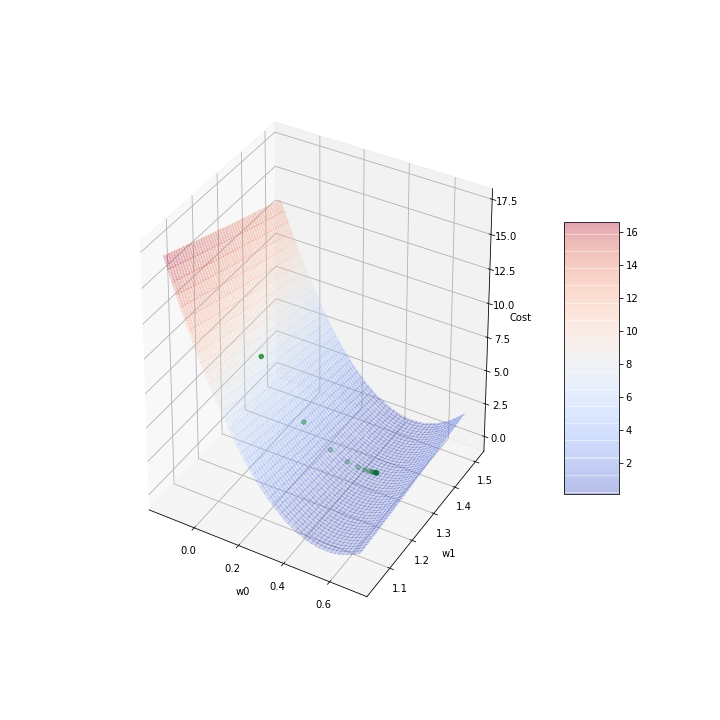

In [46]:
import IPython
img = IPython.display.Image(filename='fig_custo.png')
img